# [Neural Networks and Hyperparameters](https://campus.datacamp.com/courses/introduction-to-deep-learning-with-pytorch/neural-network-architecture-and-hyperparameters-2?ex=1)

Chapter 2 from the DataCamp Introduction to Deep Learning with PyTorch course.

## 1 - Activation Functions

Add non-linearity to neural networks:
* Sigmoid: binary classification
* Softmax for multi-class classification

Using no linearity a network can learn more complex interactions between inputs and targets than only linear relationships.

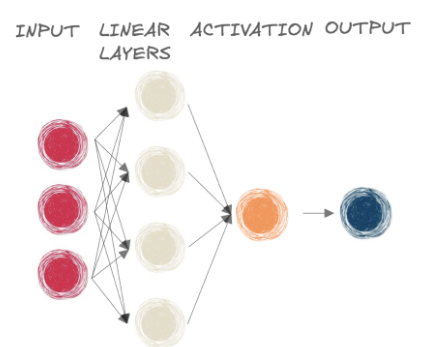

### 1.1 - Sigmoid Function

The sigmoid  function “squashes” arbitrary values into the [0, 1] interval, outputting something that can be interpreted as a probability ([Deep Learning with Python](https://deeplearningwithpython.io/chapters/chapter04_classification-and-regression/#classifying-movie-reviews-a-binary-classification-example))

In [1]:
import torch
import torch.nn as nn

input_tensor = torch.tensor([[6]])
sigmod = nn.Sigmoid()
output = sigmod(input_tensor)
print(output)

/home/devenv/Projects/deep-learning-with-pytorch/.venv/lib/python3.13/site-packages/torch/_subclasses/functional_tensor.py:279: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:81.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


tensor([[0.9975]])


Typically, `nn.Sigmoid()` is added as the last step in `nn.Sequential()`, automatically transforming the output of the final lineal layer.

A neural network with only linear layers and a sigmoid activiation behaves like logistic regression.

In [12]:
input_tensor = torch.tensor(
    [[1.34, 3.65, -0.78]]
)

n_inputs = 3
n_outputs =  1

# Neural network
model = nn.Sequential(
    nn.Linear(n_inputs, 5),
    nn.Linear(5, n_outputs),
    nn.Sigmoid()
)

# Model capacity
# Layer 1: 4 * 5 = 20 parameters
# Layer 2 (output): 6 * 1 = 6 parameters
capacity = 0
for p in model.parameters():
    capacity += p.numel()
print(f'Model capacity: {capacity}')

# Output
output = model(input_tensor)
print(output)

Model capacity: 26
tensor([[0.7816]], grad_fn=<SigmoidBackward0>)


### 1.2 - Softmax Function

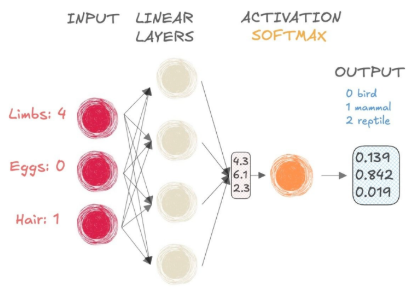

In [20]:
input_tensor = torch.tensor(
    [[1.0, 4.0, 8.0]]
)

model = nn.Sequential(
    nn.Linear(3, 4),
    nn.Linear(4, 3),
    nn.Softmax(dim=-1) # Indicates softmax is applied to the input tensor's last dimention
)

output = model(input_tensor)
print(output)

tensor([[0.1014, 0.8297, 0.0689]], grad_fn=<SoftmaxBackward0>)


## 2 - Running a Forward Pass

* Make predictions = running a forward pass through a network
* Training to predictions



### 2.1 - Binary Classification

In [42]:
input_tensor = torch.tensor(
    [[2.0, 3.0, 7.0], # First invidual
     [2.6, 1.0, 9.8], # Second individual
     [0.0, 1.6, 7.7]] # Thrid individual
)

binary_model = nn.Sequential(
    nn.Linear(3, 1),
    nn.Sigmoid()
)

predictions = binary_model(input_tensor)
print(predictions)

tensor([[0.2133],
        [0.0399],
        [0.0514]], grad_fn=<SigmoidBackward0>)


We can use a threshold of 0.5 to determine if the output belongs to one class or the other.

### 2.2 - Multiclass classification

In [43]:
multiclass_model = nn.Sequential(
    nn.Linear(3, 2), # Three inputs per individual, 2 classes to predict
    nn.Softmax(dim=-1)
)

prediction_class = multiclass_model(input_tensor)
print(prediction_class)

tensor([[0.4230, 0.5770],
        [0.4034, 0.5966],
        [0.1842, 0.8158]], grad_fn=<SoftmaxBackward0>)


### 2.3 - Regression

In [ ]:
regression_model = nn.Sequential(
    nn.Linear(3, 4),
    nn.Linear(4, 1)
)

regression_pred = regression_model(
    input_tensor
)
print(regression_pred)

tensor([[0.5696],
        [0.9800],
        [1.0626]], grad_fn=<AddmmBackward0>)


## 3 - Loss functions

 * Using loss function to assess model predictions. See how good our predictions are compared to the actual values.

 * Our goal is to minimize loss.

 * Use One-hot enconding to convert the previous softmax output to a tensor of zeros and ones to compare ground classes versus predicted classes e.i. to evaluate model performance.

In [56]:
# One-hot encoding for three classes
import torch.nn.functional as F

for i in range(0, 3):
    print(F.one_hot(
        torch.tensor(i), 
        num_classes=3
        )
    )

tensor([1, 0, 0])
tensor([0, 1, 0])
tensor([0, 0, 1])


* The most commonly used loss function for classification is cross-entropy loss.

* The one-hot encondign ensures tensor are in the correct format for the loss function.

In [ ]:
from torch.nn import CrossEntropyLoss

scores = torch.tensor([-5.2, 4.6, 0.9])
one_hot_target = torch.tensor([1, 0, 0])

# Loss value 
criterion = CrossEntropyLoss()
print(
    criterion(
        scores.double(),
        one_hot_target.double()
    )
)

tensor(9.8245, dtype=torch.float64)


## 4 - Update Model Parameters

* Using derivates to update model parameters.

* A model predicts poorly when loss is high.

* We can use derivatives, or gradients, to minimize the loss e.i. reach the loss function's minimum.

* Convex functions have a global minimum. Non-convex function such as loss function have multiple local minimum, where the value is lower than nearby points but not the lowest overall.

* The aim is to locate the global minimum in the loss function.

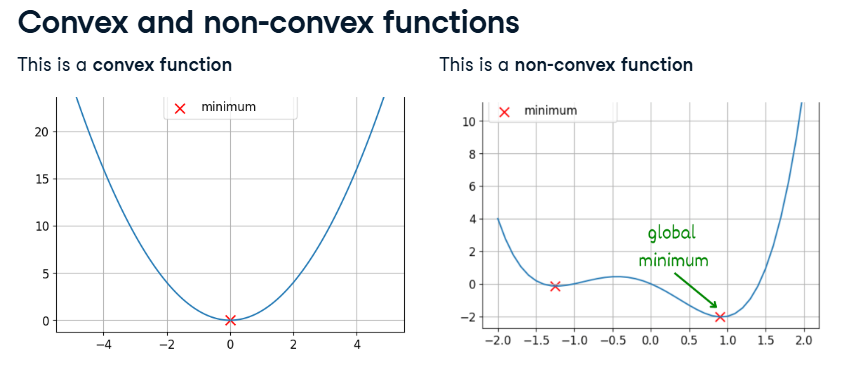

* In training, we run a forwad pass on the features and computes loss by comparing predictions to the target value.

* The layer weights and biases are randomly initialized when the model is created. Those are updated during training using a **backward pass** or **backpropagation**.

* En deep learing, derivatives are known as gradients. The loss function gradients are compute to update model parameters.

* We can calculate local loss gradientes with respect to each layer's parameters

### 4.1 - Backpropagation in PyTorch

In [ ]:
# 1) Run a forward pass

# Inputs
input_tensor = torch.tensor(
    [[2.0, 3.0, 7.0], # First invidual
     [2.6, 1.0, 9.8], # Second individual
     [0.0, 1.6, 7.7]] # Thrid individual
)

# True labels
ground_tensor = torch.tensor(
    [[1, 0],
     [0, 1],
     [0, 1]]
)

model = nn.Sequential(
    nn.Linear(3, 8),
    nn.Linear(8, 4),
    nn.Linear(4, 2)
)

prediction = model(input_tensor)
print(prediction)


tensor([[ 1.9262, -0.6916],
        [ 1.9648, -1.0276],
        [ 1.5638, -0.7684]], grad_fn=<AddmmBackward0>)


In [84]:
# 2) Define a loss function: CrossEntropyLoss. 
# # Calculate the loss and gradients.

criterion = nn.CrossEntropyLoss()
loss = criterion(
    prediction.double(), # predictions
    ground_tensor.double() # target
)
print(loss, '\n')

# Using .backward(), the gradients based on this loss are calculated
# and stored in the .grad attributes of each layer's weights and biases.
loss.backward()

# Acces each layer's gradients
model[0].weight.grad
model[0].bias.grad

model[1].weight.grad
model[1].bias.grad

print(
    model[2].weight.grad,
    model[2].bias.grad
)

tensor(1.8455, dtype=torch.float64, grad_fn=<DivBackward1>) 

tensor([[-0.3977,  0.4411, -1.6226,  0.2728],
        [ 0.3977, -0.4411,  1.6226, -0.2728]]) tensor([ 0.5986, -0.5986])


Updating model parameters manually: for each layer gradient and bias.

In [ ]:
# Learning rate: tunable parameter
lr = 0.001

# Update the weights
weight = model[2].weight
weight_grad = model[2].weight.grad # How to compute this gradient?

weight = weight - (lr * weight_grad)
print(weight)

# Update the biases
bias = model[2].bias
bias_grad = model[2].bias.grad

bias = bias - (lr * bias_grad)
print(bias)

tensor([[-0.1099,  0.4769, -0.3401,  0.3627],
        [ 0.2875,  0.1228,  0.4071, -0.2317]], grad_fn=<SubBackward0>)
tensor([0.2453, 0.4065], grad_fn=<SubBackward0>)


### 4.2 - Gradient Desent

Mechanism to find the global minimum of loss functions. PyTorch simplifies this with optimizers like stochastic gradient descent (SGD).

In [89]:
import torch.optim as optim

# Create the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Perform parameter updates
optimizer.step()

## 5 - Sources and Bigliography

https://www.datacamp.com/tutorial/forward-propagation-neural-networks  
https://www.datacamp.com/tutorial/pytorch-tutorial-building-a-simple-neural-network-from-scratch  
https://deeplearningwithpython.io/chapters/chapter01_what-is-deep-learning/  